# Questão 4

> Você é analista de dados de uma instituição financeira. Sua missão é desenvolver
um modelo preditivo para identificar clientes com maior probabilidade de se tornarem
maus pagadores (inadimplentes). O banco quer usar essas informações para reduzir
riscos, melhorar sua carteira de crédito e apoiar decisões estratégicas de concessão de
empréstimos.
>
> Será utilizada a base de dados Risco de Crédito (Kaggle), que contém informações
sociodemográficas, comportamentais e financeiras dos clientes.
Variável-alvo: Class – good se o cliente é considerado bom pagador ; bad se for
mau pagador.e u


## Contextualização

O risco de crédito modela a propabilidade de um potencial cliente bancário não cumprir seus deveres de pagamentos. Este é um risco óbvio para o banco, que perde capital e lucros; em grande escala, pode, em teoria, ser um risco existencial que pode levar à falência, se o risco for considerado abaixo do real.

Estimar um risco acima do real também é problemático: o banco perderá a oportunidade de fazer um empréstimo e pôr seu capital em uso. Se esse viés for sistêmico, o crédito se tornará muito caro. Se a inadimplencência for alta, também: as instituições cobraram juros mais altos para compensar o risco, aumentando o preço do dinheiro para todos.

Por isso, a própria avaliação do risco de crédito é fundamental não só para a saúde financeira das instituições, mas para o funcionamento mais eficaz de todo o sistema financeiro.

## Análise Descritiva dos Dados

In [3]:
from brandedpipes import __
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "credit_customers.csv"

# Load the latest version
q4_df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ppb00x/credit-risk-customers",
  file_path,
)

q4_df.head()

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 149k/149k [00:00<00:00, 346kB/s]


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


Colunas:

In [13]:
q4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

21 colunas, nenhuma com valores nulos. Analisemo-as, dividindo-as entre numéricas e categóricas.

In [24]:
numeric = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
categorical = [
    "checking_status",
    "credit_history",
    "purpose",
    "savings_status",
    "employment",
    "personal_status",
    "other_parties",
    "property_magnitude",
    "other_payment_plans",
    "housing",
    "job",
    "own_telephone",
    "foreign_worker",
]
target = ["class"]

### Colunas numéricas

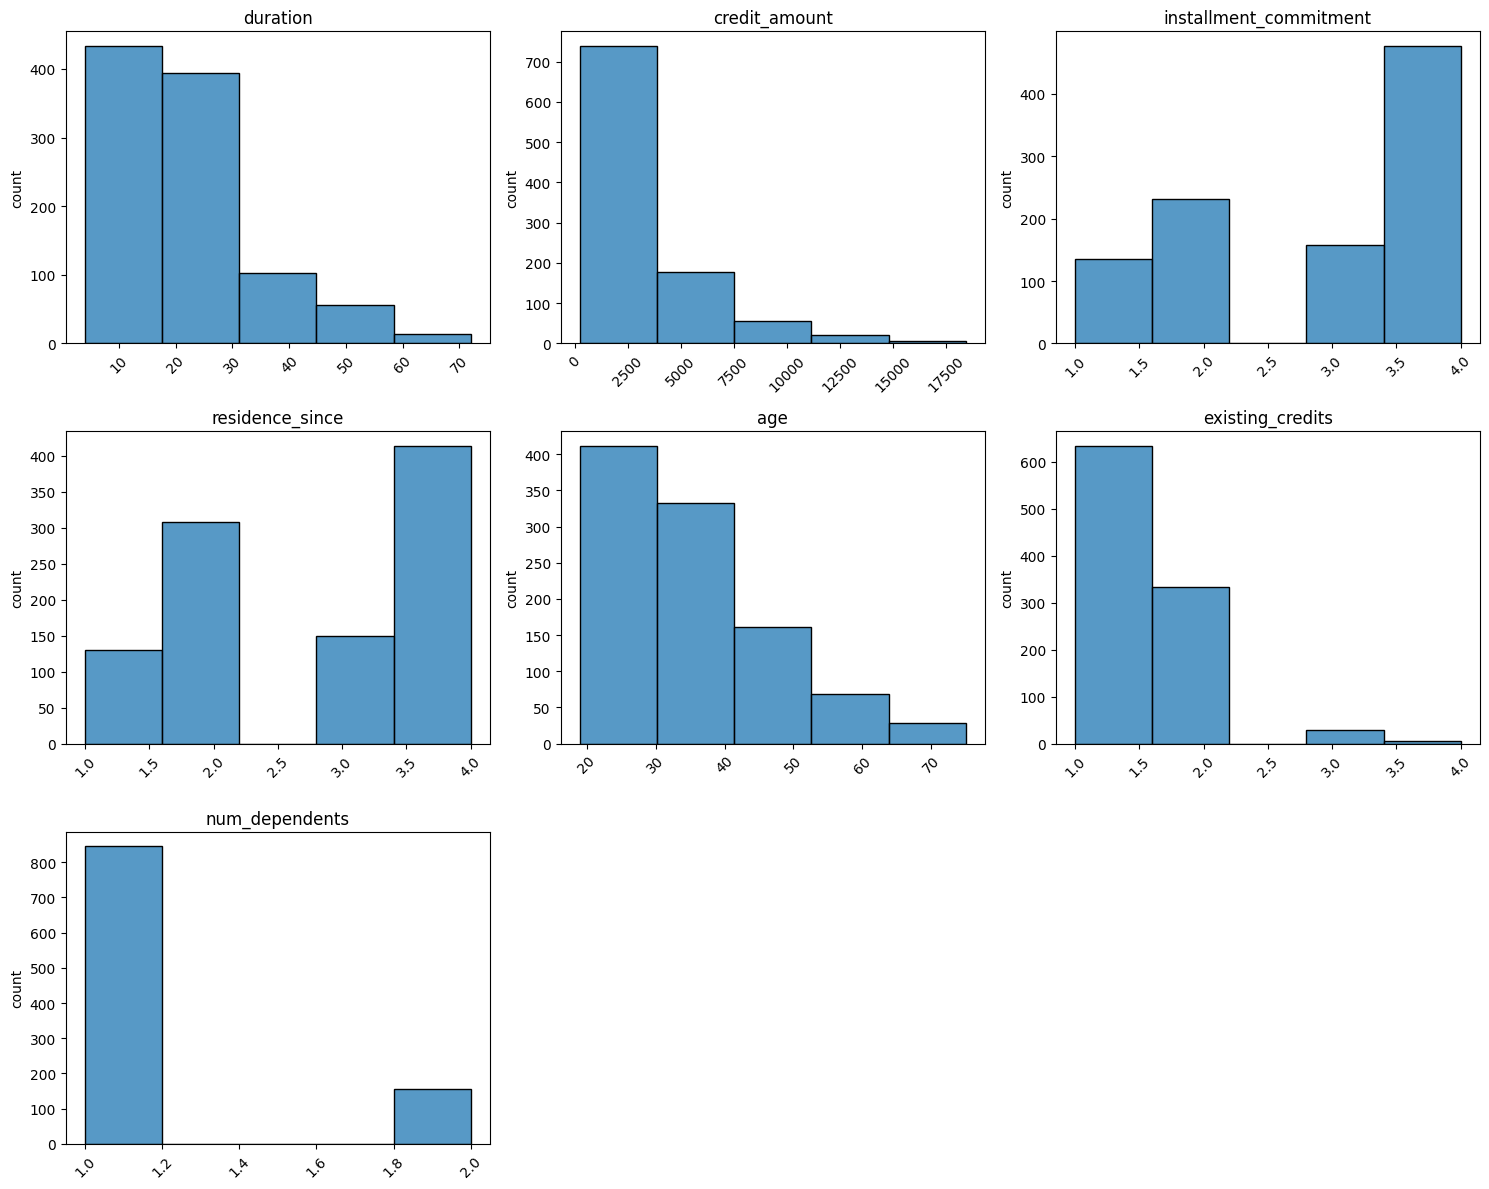

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [14]:
histograms(q4_df, numeric)
q4_df[numeric].describe()

A maioria é quase categórica, valores numéricos inteiros. Exceção é o `credit_amount`.

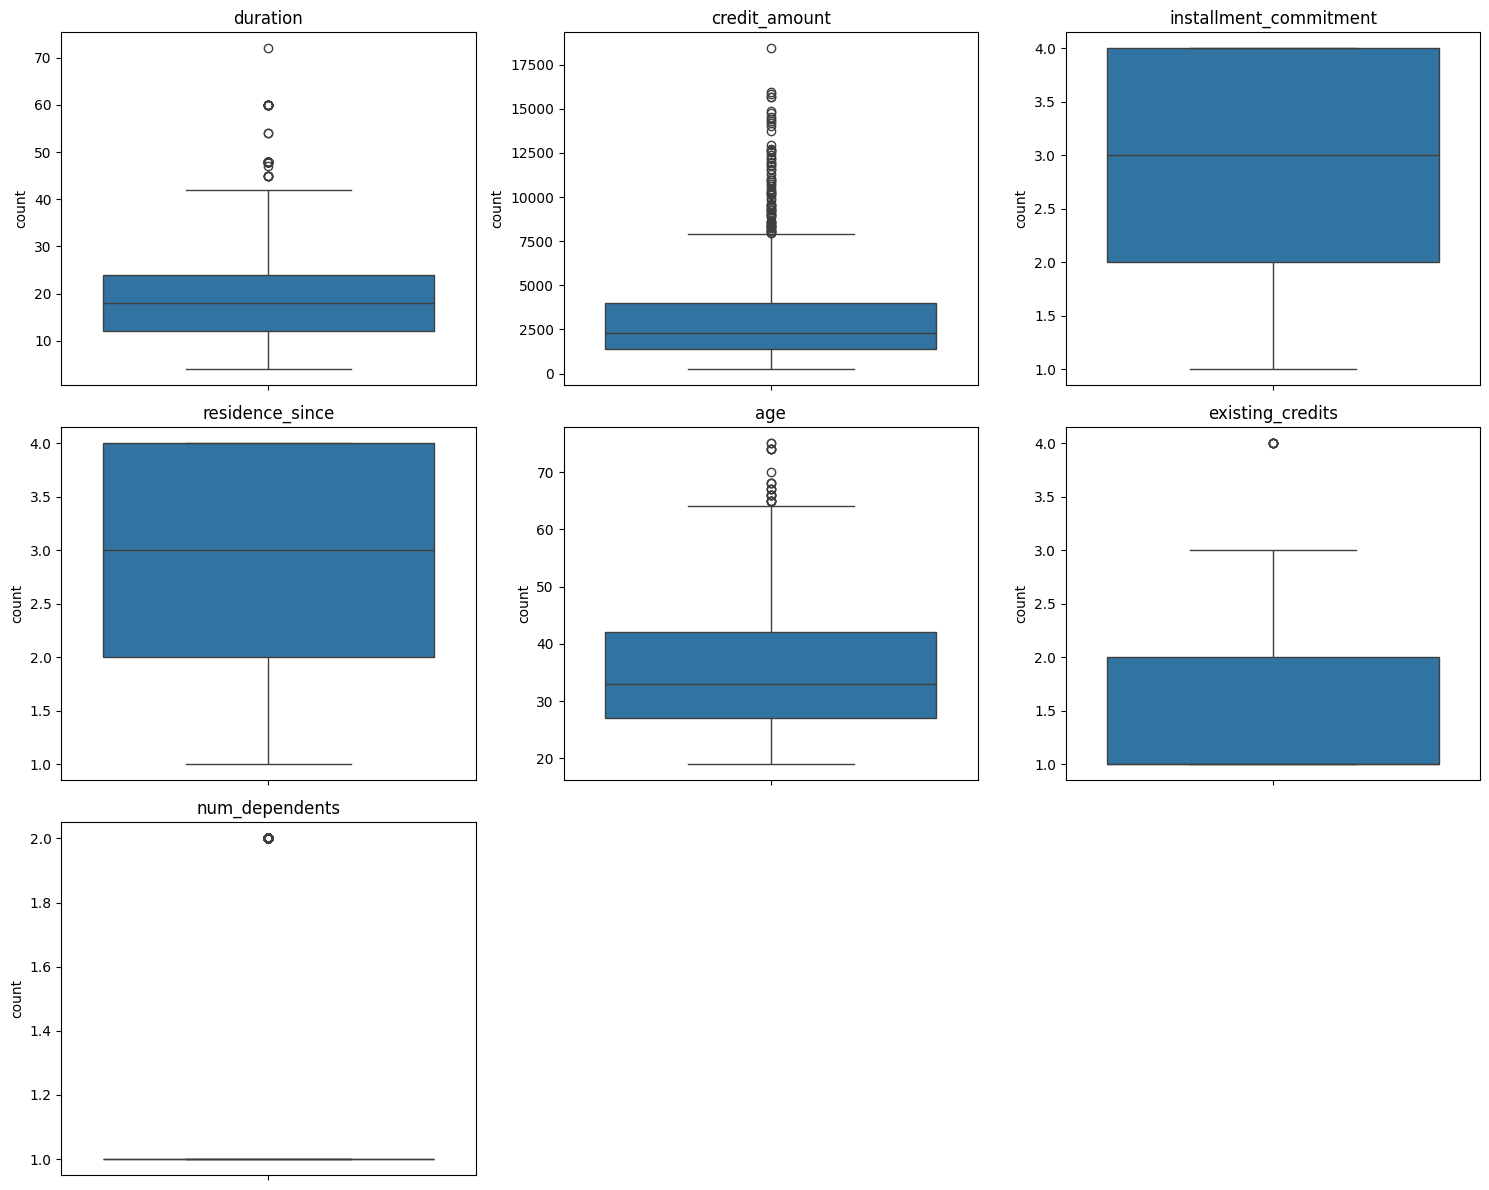

In [18]:
boxplots(q4_df, numeric)

Quase todas têm uma cauda. Vamos usar modelos não paramétricos porém, então isto não deve dar problemas.

## Colunas categóricas

In [104]:
q4_df['checking_status']

0               <0
1         0<=X<200
2      no checking
3               <0
4               <0
          ...     
995    no checking
996             <0
997    no checking
998             <0
999       0<=X<200
Name: checking_status, Length: 1000, dtype: object

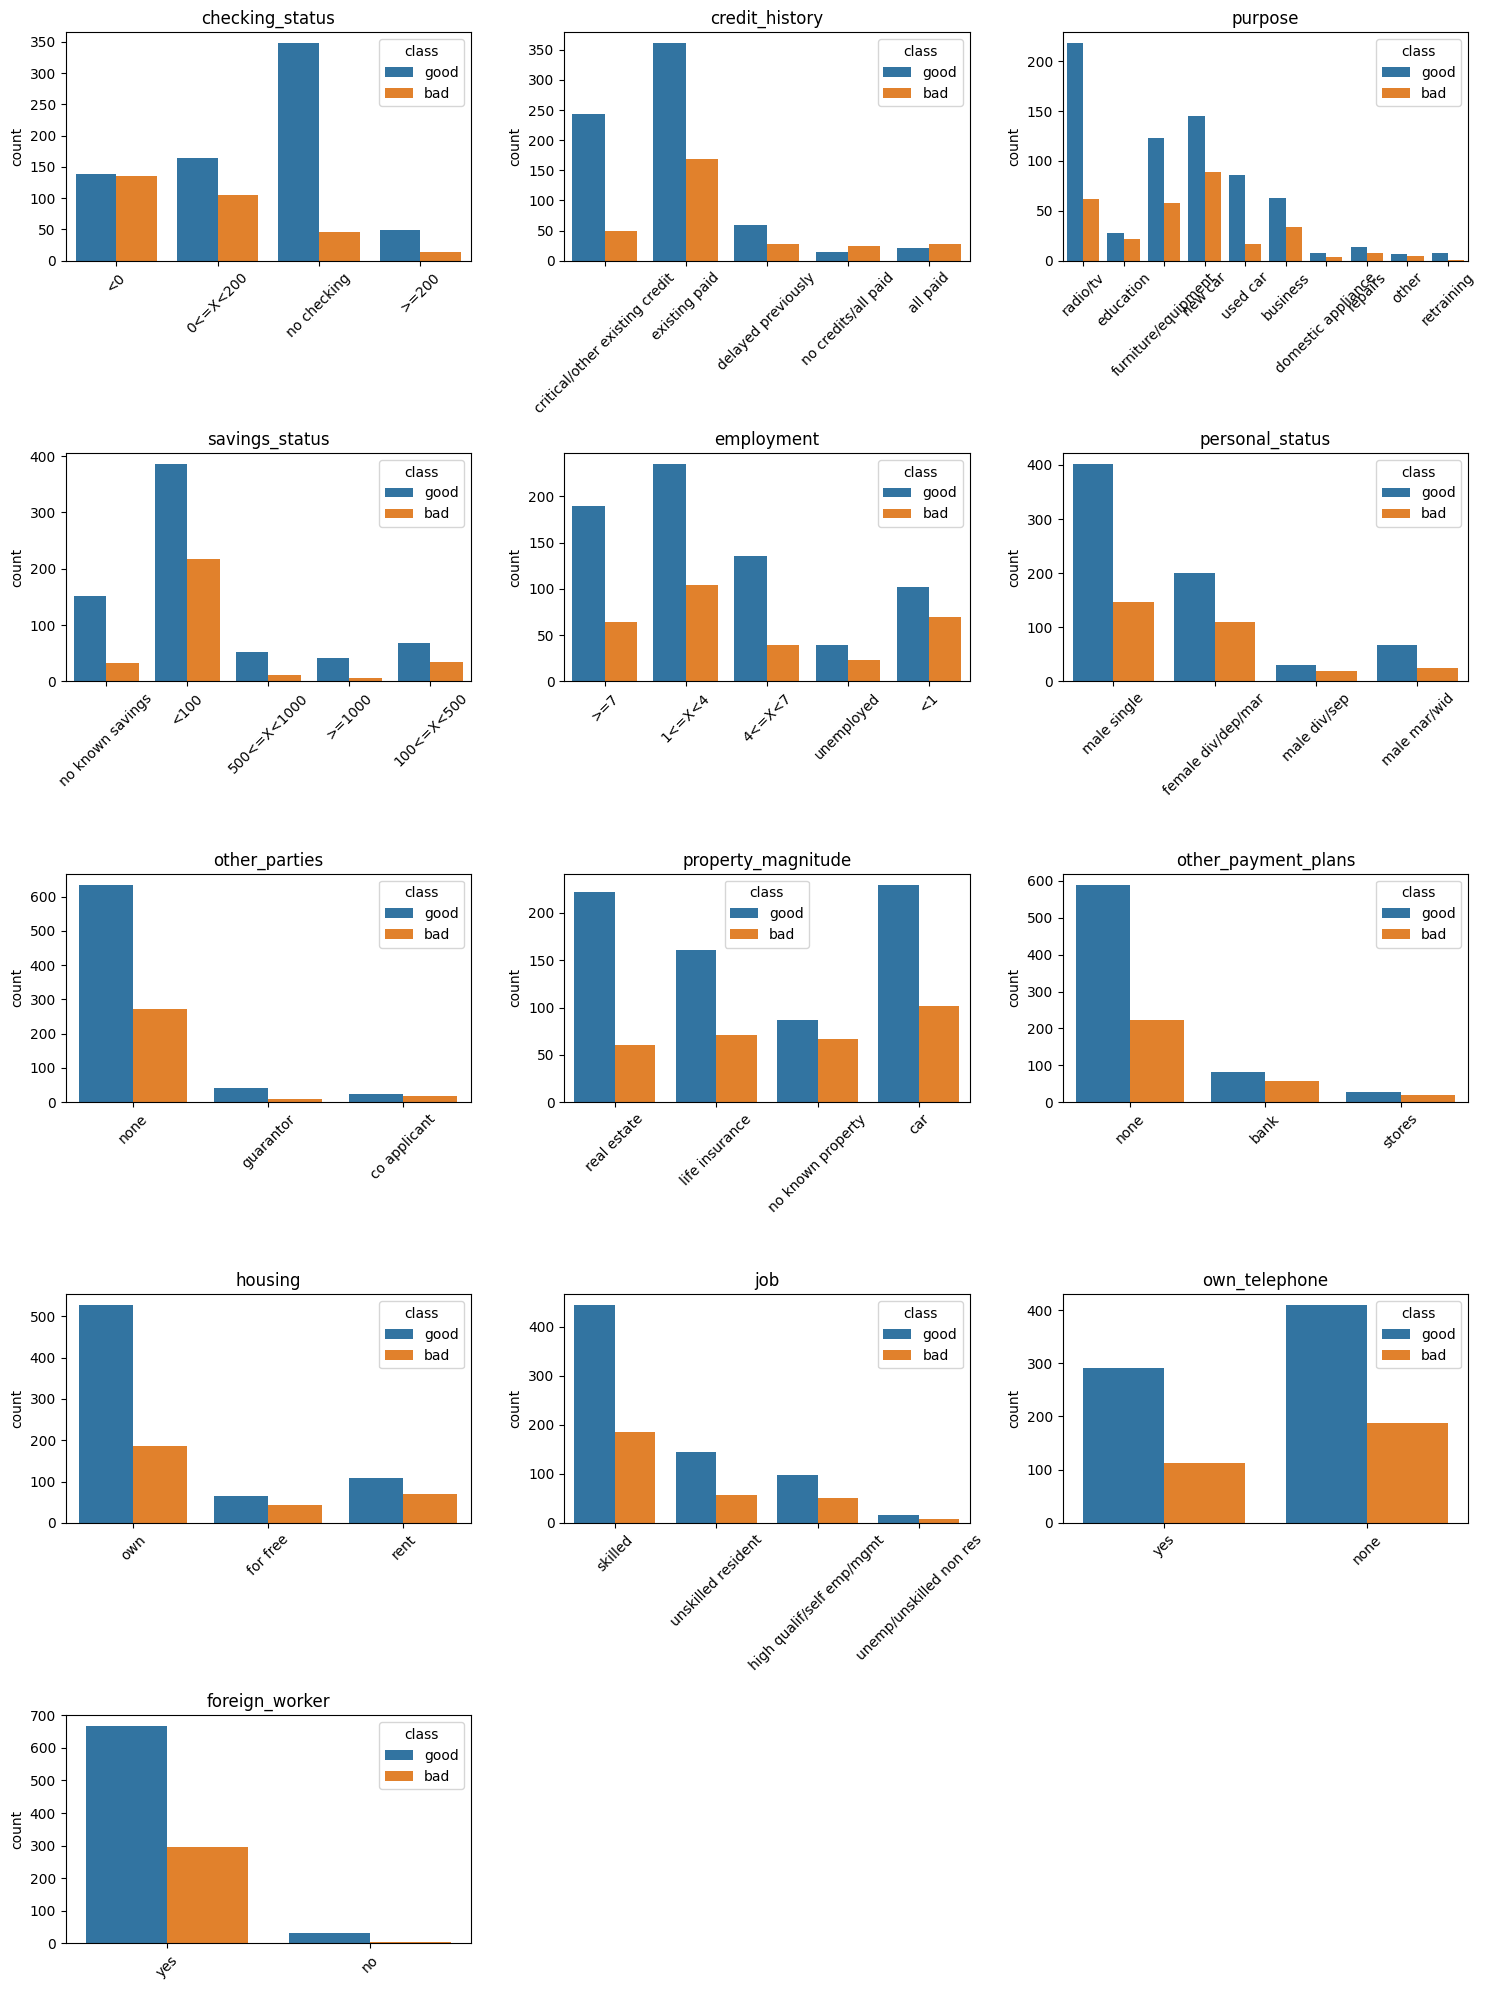

In [35]:
countplots(q4_df, categorical, hue='class')

Categorias bem balanceadas, nenhuma patologicamente desbalanceada, embora algumas bem viesadas (`foreign_worker`, `other_parties`).

NO geral, todas as categorias apresentam valores em ambas as classes. Bom sinal! Isso indica que são, no geral, relevantes.

## Valor-alvo

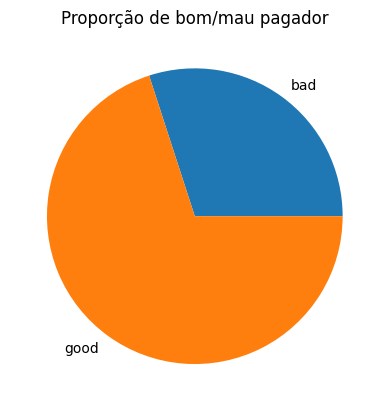

In [90]:
class_groupby = q4_df.groupby('class')
plt.pie(class_groupby.size(), labels=class_groupby.size().index, )
plt.title(label='Proporção de bom/mau pagador')
plt.show()

Diferença entre classes de saída não é tão grande: uma é quase 50% da outra. Balanceamento talvez não seja necessário.

## Definição e Seleção dos Modelos

Vamos testar três modelos: regressão logística, Random Forest e CatBoost. A ideia é comparar o resultado desses três modelos de categorias bem diferentes (regressão, bagging, boosting).

In [70]:
X = q4_df.drop(target, axis=1)
y = q4_df[target]

### Regressão linear

Antes de mais nada, vamos procurar colinearidades. 

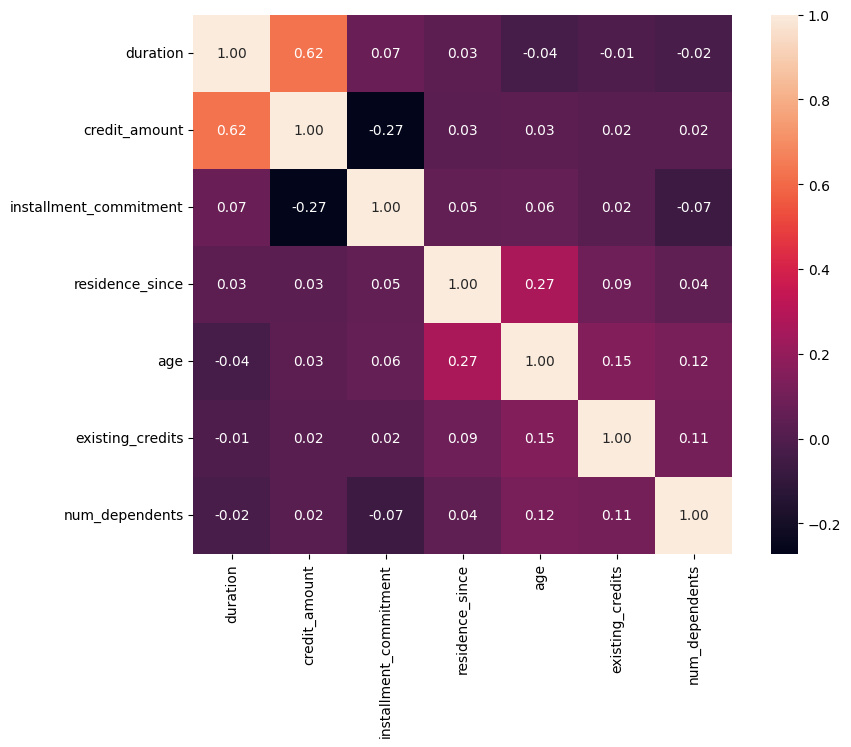

In [71]:
X_corr = X.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(X_corr, annot=True, fmt=".2f", square=True)
plt.show()

Única correlação mais forte é entre `credit_amount`  e `duration`. Chequemos VIF:

In [83]:
X_num = sm.add_constant(X[numeric])


vif_df = pd.DataFrame({
    "feature": X_num.columns,
    "VIF": [variance_inflation_factor(X_num.values, i)
            for i in range(X_num.shape[1])]
}).sort_values(by='VIF', ascending=False)
vif_df

,feature,VIF
0,const,35.036815
2,credit_amount,1.994152
1,duration,1.857215
3,installment_commitment,1.227527
5,age,1.121527
4,residence_since,1.082781
6,existing_credits,1.036226
7,num_dependents,1.030099


Nennum valor extremamente correlacionado. Excelente! Rodemos o modelo.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )

Acurácia : 0.795
Precisão : 0.825
Recall   : 0.901
F1-score : 0.861


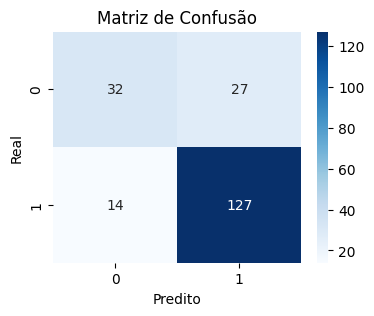

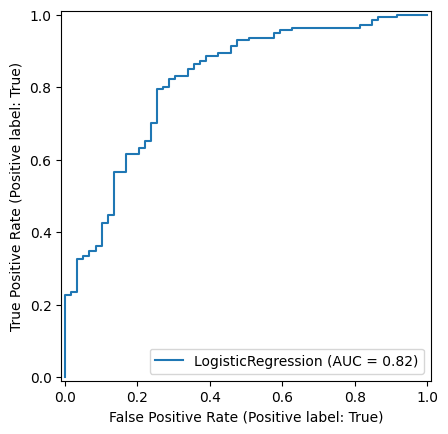

In [119]:
from sklearn.metrics import RocCurveDisplay

def prepare_lreg(X):
    return pd.get_dummies(
        sm.add_constant(X),
        columns=categorical,
        drop_first=True,
        dtype=int
    )

X_lreg_train = prepare_lreg(X_train)
y_train_vector = y_train['class'] == 'good'

lreg_model = LogisticRegression(max_iter=10000)
lreg_model.fit(X_lreg_train, y_train_vector)

X_lreg_test = prepare_lreg(X_test)

y_test_vector = y_test['class'] == 'good'
evaluate_model(lreg_model, X_lreg_test, y_test_vector)

RocCurveDisplay.from_estimator(lreg_model, X_lreg_test, y_test_vector)
plt.show()

Baixa acurácia, boa precisão, recall e F1. Mas precisamos de 1000 iterações para convergir. 

Seria um resultado bom em outros casos, mas queremos evitar os falsos positivos! O modelo, como feito agora, não é ideal.

### Random Forest

Acurácia : 0.795
Precisão : 0.801
Recall   : 0.943
F1-score : 0.866


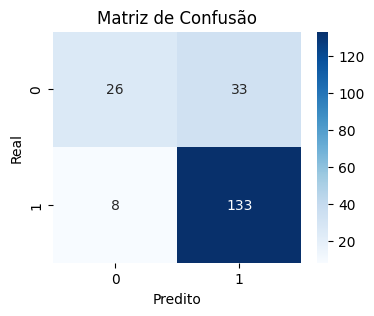

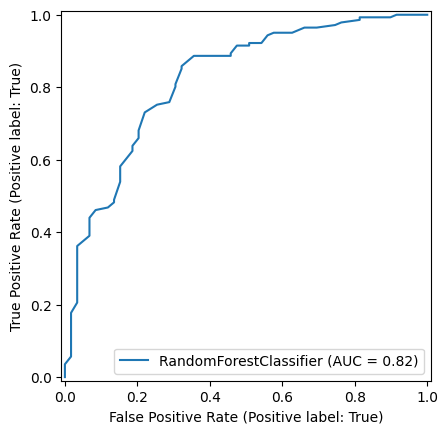

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

def prepare_rf(X):
    return pd.get_dummies(
        X,
        columns=categorical,
        drop_first=True,
        dtype=int
    )


X_rf_train = prepare_rf(X_train)

rf_model.fit(X_rf_train, y_train_vector)

X_rf_test = prepare_rf(X_test)
evaluate_model(rf_model, X_rf_test, y_test_vector)

RocCurveDisplay.from_estimator(rf_model, X_rf_test, y_test_vector)
plt.show()

Similar a regressão logística, bom recall e precisão, baixa acurácia. AUC-ROC muito promissor. Mas novamente, nosso caso de uso quer evitar falsos positivos para não tomar calote.

### CatBoost

Uma coisa legal do CatBoost é que não precisamos codificar as categorias!

Acurácia : 0.765
Precisão : 0.801
Recall   : 0.887
F1-score : 0.842


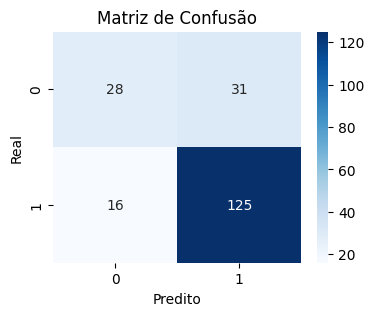

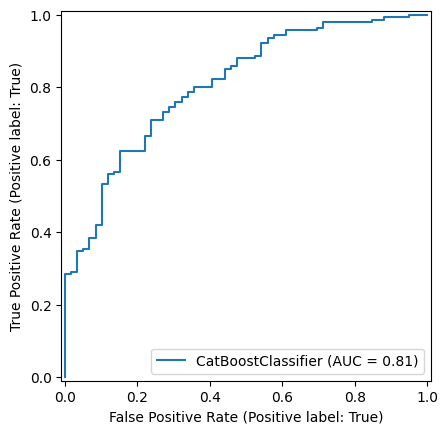

In [127]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
    iterations=100, random_state=42, verbose=False
)

catboost_model.fit(X_train, y_train_vector, cat_features=categorical)

evaluate_model(catboost_model, X_test, y_test_vector)
RocCurveDisplay.from_estimator(catboost_model, X_test, y_test_vector)
plt.show()

Assim como os outros, valores semelhantes de acurácia, recall, precisão, F1, AUC-ROC. Aparentemente todos os modelos precisam de algum trabalho!

Um ponto que poderíamos ver seria balanceamento, mas não temos tempo hábil.

## Explicabilidade de Variáveis com SHAP value

### Regressão linear

In [132]:
import shap

background = X_lreg_train.sample(100, random_state=42)
explainer = shap.KernelExplainer(lreg_model.predict, background)
shap_values = explainer.shap_values(X_lreg_test)

  0%|          | 0/200 [00:00<?, ?it/s]

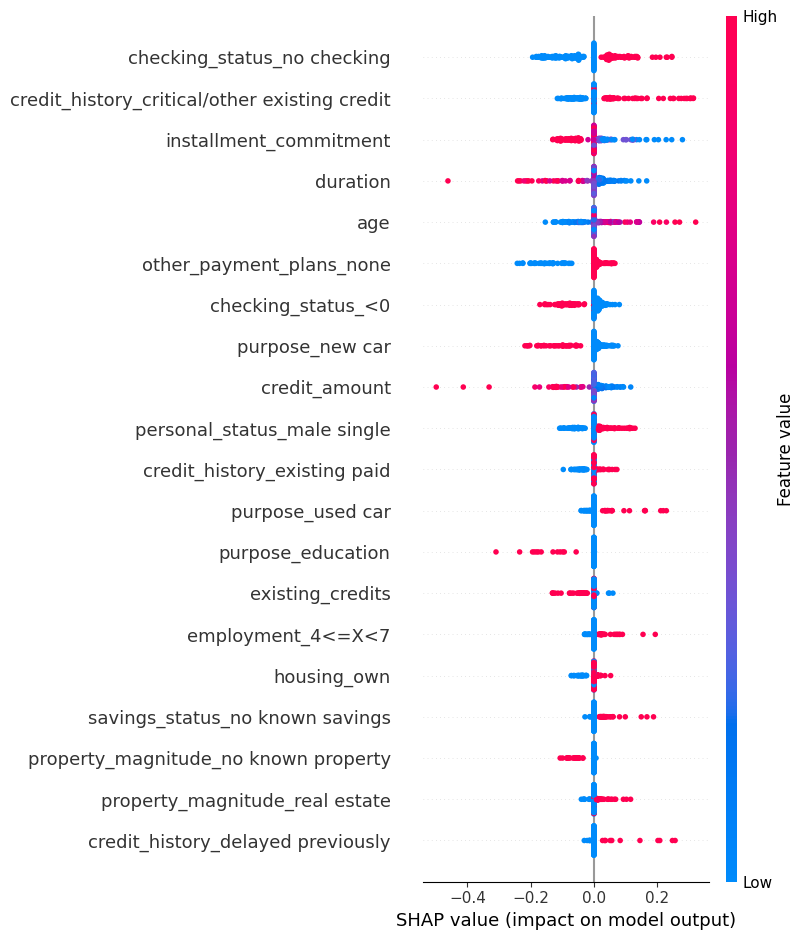

In [137]:
shap.summary_plot(shap_values, X_lreg_test.iloc[:200], feature_names=X_lreg_train.columns)

Valores que parecem afetar mais: não possuir conta-corrente. Intressante notar que, se o propósito é educação, a tendência é ser bom pagador. (Faz sentido, porque nos EUA não se pode declarar falência por empréstimo educacional).

### Random forest

/tmp/ipykernel_863467/903673919.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_rf_train, feature_names=X_rf_train.columns)
/home/adam/lib/virtualenv/data-mining-experiments/lib/python3.12/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/home/adam/lib/virtualenv/data-mining-experiments/lib/python3.12/site-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and

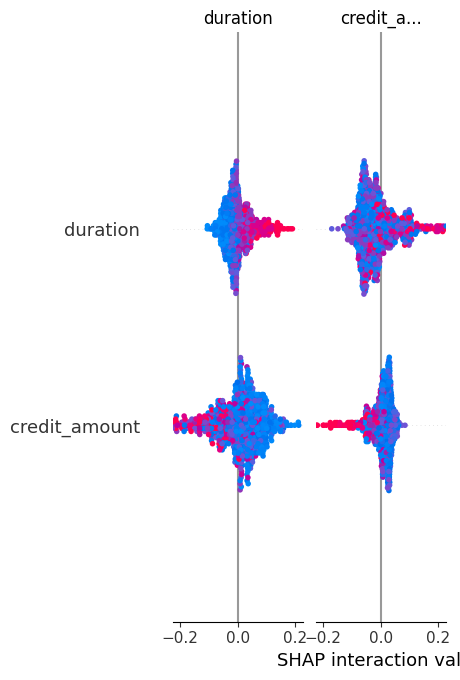

In [173]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_rf_train)
shap.summary_plot(shap_values, X_rf_train, feature_names=X_rf_train.columns)

⚠️⚠️⚠️ Ok, esse gráfico não fez nenhum sentido. Não tem como responder essa questão.

### CatBoost

/tmp/ipykernel_863467/2029537006.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train)


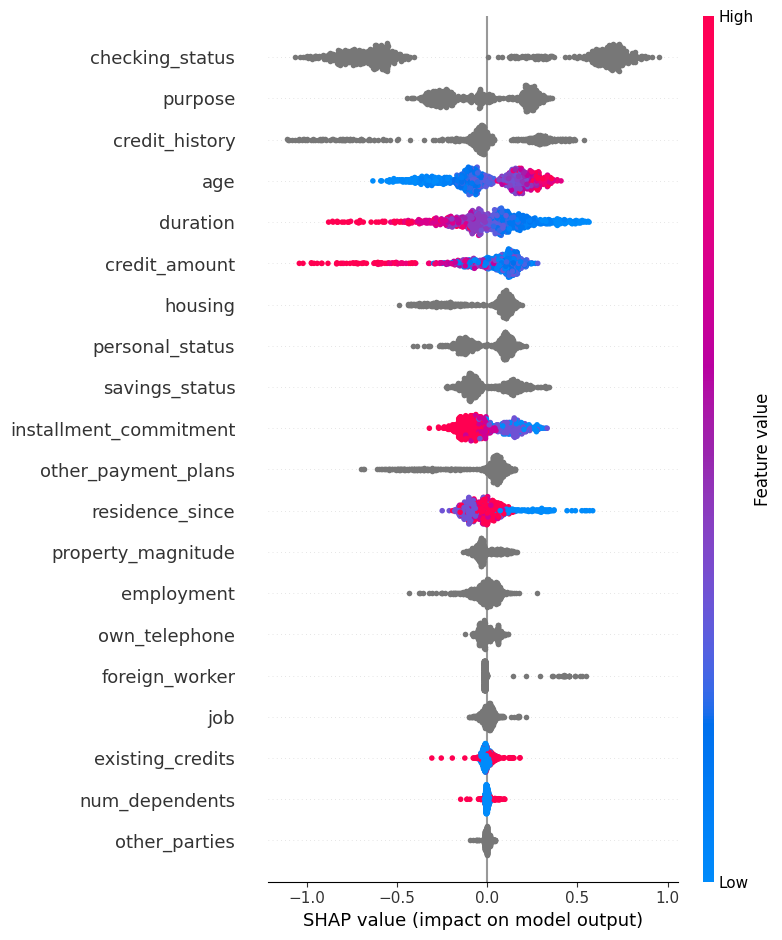

In [179]:
from catboost import Pool
pool = Pool(X_train, y_train_vector, cat_features=categorical)

explainer = shap.TreeExplainer(catboost_model)

shap_values = explainer.shap_values(pool)
shap.summary_plot(shap_values, X_train)

Interessante notar que `credit_amount`, `checking_status` and `credit_history` afetaram drasticamente, inclusive de maneira simétrica em alguns casos. Mais interessante ainda, `other_parties` não afeitou quase nada! Talvez compense dispensar esse dado na hora de empreśtimo.

## Análise não supervisionada

⚠️⚠️⚠️ Esta parte não ofi feita.

## Tomada de decisão estratética

Não faremos uma análise profunda por falta de tempo. Contudo, há algo interessante que mencionamos antes: fiadores, garantidores etc. aparentemente não afetam muito o caráter do pagador. Isso é algo que tende a restringir bastante o acesso ao crédito, então fica apenas essa ideia: talvez abandonar a prática?